In [65]:
import pandas as pd 
import requests 

In [66]:
codeTable ='JongMokCodeTable_20140616_Uodate02.xlsx'
xlsx = pd.read_excel(codeTable, index_col = '종목명')

In [67]:
import FindTable as ft

In [68]:
hundai_code = xlsx[['종목코드']].loc['현대차']
remake_code = hundai_code['종목코드'].head(1).iloc[0].replace("'","")

In [69]:
test_table = ft.Ant.findTable(remake_code)

In [70]:
import pandas as pd 
import matplotlib.pyplot as plt 
import matplotlib.ticker as ticker 
from mpl_finance import candlestick2_ohlc 
from matplotlib import font_manager, rc

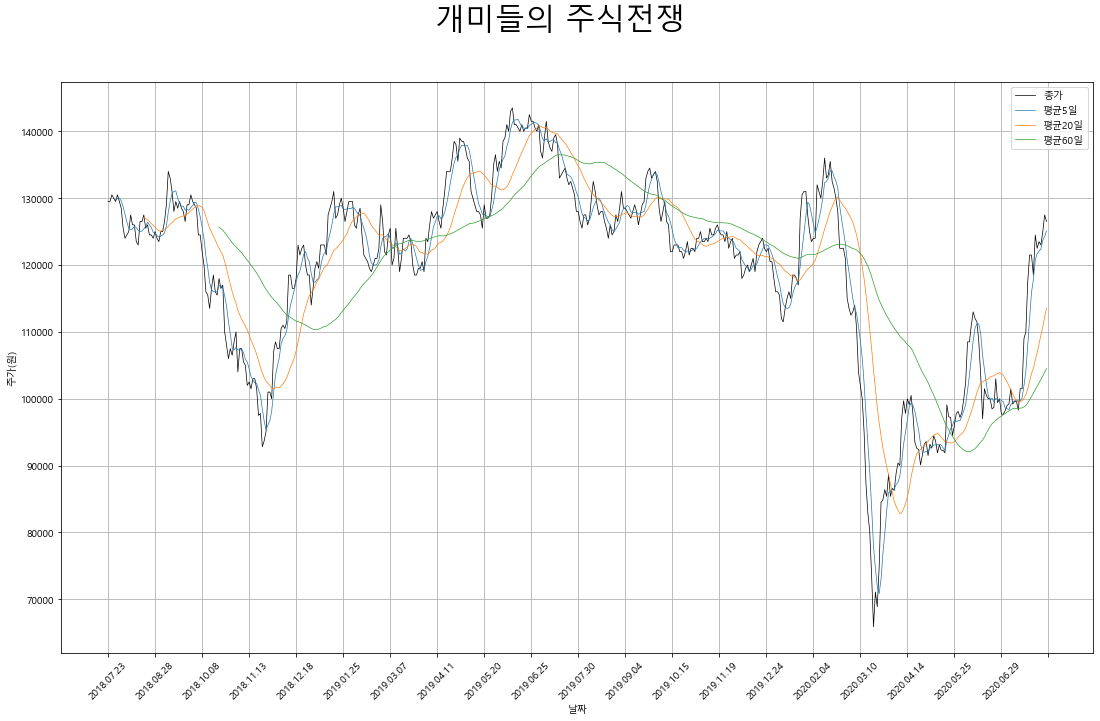

In [82]:
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
fig, ax = plt.subplots() 

test_table = test_table[::-1]
xdate = test_table.날짜.astype('str')
xdate[::-1].reset_index()['날짜']

ax.plot(xdate, test_table['종가'], label="종가",linewidth=0.7,color='k')
ax.plot(xdate, test_table['종가'].rolling(window=5).mean(), label="평균5일",linewidth=0.7)
ax.plot(xdate, test_table['종가'].rolling(window=20).mean(), label="평균20일",linewidth=0.7)
ax.plot(xdate, test_table['종가'].rolling(window=60).mean(), label="평균60일",linewidth=0.7)
#ax.plot(xdate, naver_data['종가'].rolling(window=120).mean(), label="평균120일",linewidth=0.7)
fig.suptitle("개미들의 주식전쟁",fontsize=30)
ax.set_xlabel("날짜")
ax.set_ylabel("주가(원)")
ax.xaxis.set_major_locator(ticker.MaxNLocator(25))
fig.set_size_inches(18.5, 10.5)

ax.legend(loc=1)
plt.xticks(rotation = 45)

plt.grid()
plt.show()

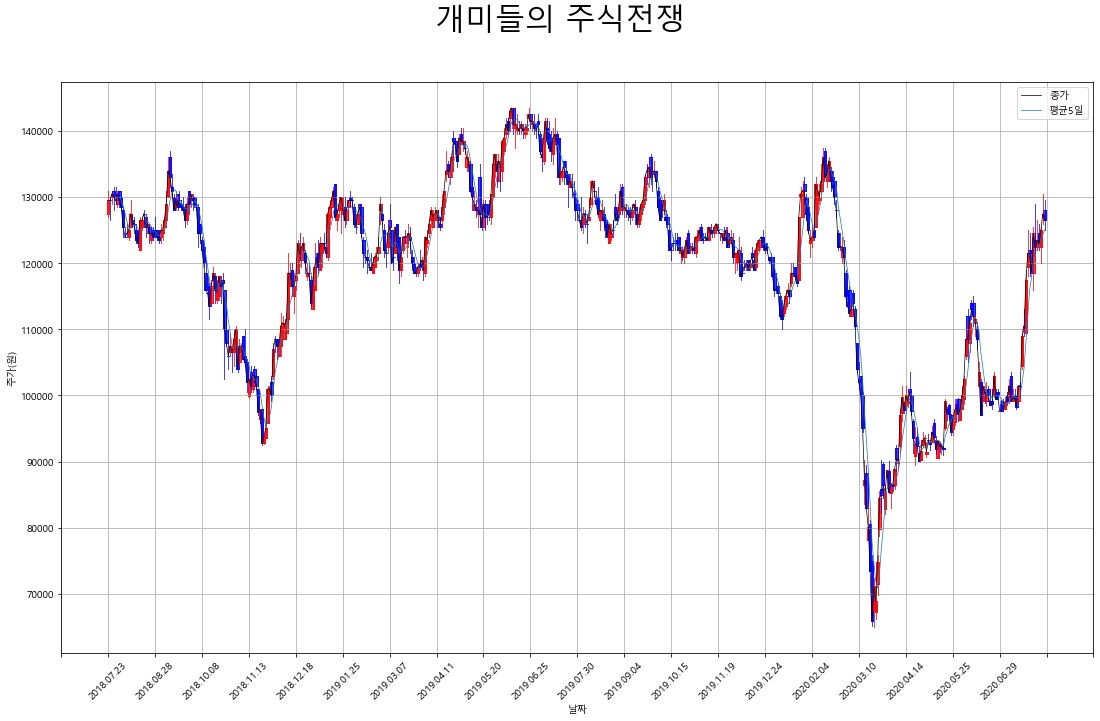

In [83]:
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
fig, ax = plt.subplots() 

ax.plot(xdate, test_table['종가'], label="종가",linewidth=0.7,color='k')
ax.plot(xdate, test_table['종가'].rolling(window=5).mean(), label="평균5일",linewidth=0.7)
candlestick2_ohlc(ax, test_table['시가'], test_table['고가'],test_table['저가'],test_table['종가'], width=1.3, colorup='r', colordown='b')


fig.suptitle("개미들의 주식전쟁",fontsize=30)
ax.set_xlabel("날짜")
ax.set_ylabel("주가(원)")
ax.xaxis.set_major_locator(ticker.MaxNLocator(25))
fig.set_size_inches(18.5, 10.5)

ax.legend(loc=1)
plt.xticks(rotation = 45)

plt.grid()
plt.savefig('test.png')
plt.show()